<a href="https://colab.research.google.com/github/Bhairavi-avt/Mini-Project/blob/main/ImageClassificationMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ipython-autotime
%load_ext autotime

time: 551 µs (started: 2021-06-28 07:55:03 +00:00)


In [4]:
!pip install bing-image-downloader

time: 3.14 s (started: 2021-06-28 07:55:03 +00:00)


In [5]:
!mkdir images

time: 126 ms (started: 2021-06-28 07:55:07 +00:00)


In [6]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/pretty sunflower


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://pixfeeds.com/images/flowers/sunflowers/1280-506587098-beautiful-sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/75/ad/3f/75ad3f4512a7cfd54b272a2e6ee73c46.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/91/39/52/913952e8f81e8faa94481bda88e4dfba.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/28/64/0b/28640bb3517270d7670f2ad294ddd6ab.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/69/30/e0/6930e0d5364f2eead9591771a7515665.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/f7/0d/11/f70d11647628b048be42a5b0df480a8b.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.pinimg.com/originals/46/1b/32/461b32b654b404395049c70

In [7]:
downloader.download("cricket ball",limit=30,output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/cricket ball


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://n1.sdlcdn.com/imgs/a/x/p/SS-True-Test-Cricket-Ball-SDL133148022-1-b71cd.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.sportsuncle.com/image/cache/catalog/images/ss/true-test-1024x1024.jpg
[!] Issue getting: https://www.sportsuncle.com/image/cache/catalog/images/ss/true-test-1024x1024.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #2 from https://mysports.lk/wp-content/uploads/2020/05/true-test-ball-SF-sl-1024x870.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.khelmart.com/Cricket/zoomer_Image/SS_CB_000069_large.jpg?scale.width=450
[%] File Downloaded !

[%] Downloading Image #4 from https://www.khelmart.com/Cricket/zoomer_Image/SS_CB_000071_large.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.sports91.com/wp-content/uploads/2019/04/5bbaf19632ed6dfeb55e52

In [8]:
downloader.download("cars",limit=30,output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/cars


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://www.carbodydesign.com/archive/2009/08/05-sv-9-competizione-images/SV-9-Competizione-4-lg.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/736x/73/62/d8/7362d822038afc4386906ce9ab2ce58c.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://media.whatcar.com/migration/article_inline/fa3f2b3925370291872ddcf823dd8719749dcae6.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://external-preview.redd.it/pbEfLIYe90hFmJFBXWG8K0oXU4ayUl-6-USZlF7G_qk.jpg?auto=webp&amp;s=b2d9b17a5a84826506058e26ddbaeead84d0761a
[!] Issue getting: https://external-preview.redd.it/pbEfLIYe90hFmJFBXWG8K0oXU4ayUl-6-USZlF7G_qk.jpg?auto=webp&amp;s=b2d9b17a5a84826506058e26ddbaeead84d0761a
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #4 from https://i.pinimg.com/originals/df/6e/57/df6e57b2d6050b54f683c11d271b1803.j

In [9]:
#Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['pretty sunflower','cricket ball','cars']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path  = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)  

time: 37.6 s (started: 2021-06-28 07:55:28 +00:00)


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 20.7 ms (started: 2021-06-28 07:56:06 +00:00)


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 53s (started: 2021-06-28 08:10:29 +00:00)


In [12]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 196 ms (started: 2021-06-28 08:15:20 +00:00)


In [13]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 3.9 ms (started: 2021-06-28 08:15:45 +00:00)


In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

time: 1.24 ms (started: 2021-06-28 08:29:34 +00:00)


In [15]:
accuracy_score(y_pred,y_test)

0.9629629629629629

time: 5.67 ms (started: 2021-06-28 08:18:39 +00:00)


In [16]:
confusion_matrix(y_pred,y_test)

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 1,  0,  8]])

time: 13.2 ms (started: 2021-06-28 08:19:51 +00:00)


In [20]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.93         7\n           1       1.00      1.00      1.00        11\n           2       1.00      0.89      0.94         9\n\n    accuracy                           0.96        27\n   macro avg       0.96      0.96      0.96        27\nweighted avg       0.97      0.96      0.96        27\n'

time: 13.5 ms (started: 2021-06-28 08:30:01 +00:00)


In [17]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 65.8 ms (started: 2021-06-28 08:26:47 +00:00)


In [18]:
model = pickle.load(open('img_model.p','rb'))

time: 23.1 ms (started: 2021-06-28 08:28:01 +00:00)


Enter your URLhttps://cdn.shopify.com/s/files/1/0756/1735/products/clubmatch_156g.jpg
(1850, 1850, 3)
PREDICTED OUTPUT: cricket ball


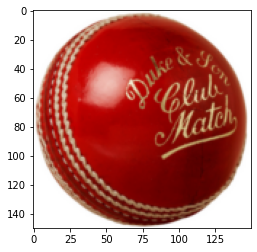

time: 56.9 s (started: 2021-06-28 08:47:58 +00:00)


In [25]:
#Testing the new image

flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')